In [1]:
"""
This notebook generates the log L2 ref - alt plots for tiQTLs (Fig. 3A).
For example track and DeepSHAP plots, please see the example tracks directory.
"""

'\nThis notebook generates the log L2 ref - alt plots for tiQTLs (Fig. 3A).\nFor example track and DeepSHAP plots, please see the example tracks directory.\n'

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [4]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

print(
    f"scp cbsu:/home2/ayh8/clipnet_pytorch/tiqtl_predictions/tiqtls_l2_scores.csv.gz -P {SCRATCH}"
)

scp cbsu:/home2/ayh8/clipnet_pytorch/tiqtl_predictions/tiqtls_l2_scores.csv.gz -P /Users/adamhe/github/scratch


In [5]:
# Load data

composite = pd.read_csv(os.path.join(SCRATCH, "tiqtls_l2_scores.csv.gz"), index_col=0)

In [16]:
print(pearsonr(composite.expt, composite.pred))
lr = LinearRegression(fit_intercept=True).fit(
        composite.expt.to_numpy().reshape(-1, 1),
        composite.pred.to_numpy().reshape(-1, 1)
    )
print(lr.coef_, lr.intercept_)

PearsonRResult(statistic=0.6323352018783411, pvalue=3.0522761403295814e-303)
[[0.94649076]] [7.32904892]


array([[0.94649076]])

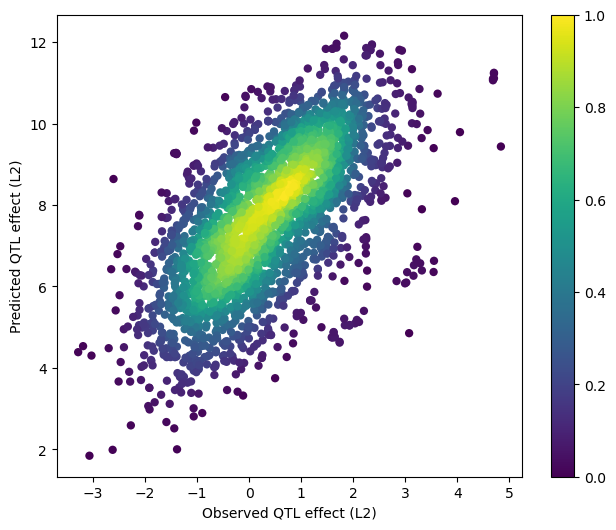

In [28]:
# Plot composite log L2 ref - alt scores

fig = plt.figure(figsize=(7.5, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=composite,
    x="expt",
    y="pred",
    c=gaussian_kde(composite.transpose())(composite.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
#ax.set_xlim(-4, -4+10)
#ax.set_ylim(1, 13)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)

plt.savefig("img/tiqtl_composite_l2_pytorch.pdf")